In [ ]:
!pip install --upgrade pip
!pip install --upgrade setuptools wheel
!pip install --upgrade "mxnet<2.0.0"
!pip install --pre autogluon

### ***PRE-ELABORAZIONE DATI***

In [ ]:
import pandas as pd
from collections import Counter

path = './drive/MyDrive/Materiale_Pellegrino_personal/NSLKDD/NSLKDD_Full.csv'
dataset = pd.read_csv(path)

In [ ]:
from sklearn.model_selection import train_test_split

# train 50% e test 50%
train, test = train_test_split(dataset, test_size=0.5)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder delle due variabili target, quindi da stringhe a interi sia in test che in train e salvo i valori nelle variabili y_test a y_train
# y_test viene utilizzata per la valutazione del modello

y_train_bin = LabelEncoder().fit_transform(train['binlabel'])
y_train = LabelEncoder().fit_transform(train['label'])
y_test_bin = LabelEncoder().fit_transform(test['binlabel'])
y_test = LabelEncoder().fit_transform(test['label'])

# tolgo la colonna 'binlabel' perché è una sotto variabile target
train = train.drop(['binlabel'], axis=1)
test = test.drop(['binlabel'], axis=1)

# sostituisco i valori originari con la codifica precedentemente fatta
target_index = train.columns.get_loc('label')
train.iloc[:, target_index] = y_train

# elimino la colonna relativa al target nel dataset di test poiché non utile
test = test.drop('label', axis=1)

In [ ]:
train

,duration,protocol_type,service,flag,symbolic,src_bytes,dst_bytes,DoS,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
61375,0,tcp,auth,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,142,20,1.00,1.0,0.0,0.0,0.14,0.04,0.00,255,20,0.08,0.04,0.00,0.00,1.0,1.0,0.0,0.0,19,0
105176,0,tcp,whois,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,8,1.00,1.0,0.0,0.0,0.06,0.05,0.00,255,8,0.03,0.05,0.00,0.00,1.0,1.0,0.0,0.0,19,0
78410,0,tcp,ftp_data,SF,334,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.00,0.0,0.0,0.0,1.00,0.00,0.00,6,6,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,9,3
16300,0,tcp,nnsp,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,113,3,0.00,0.0,1.0,1.0,0.03,0.07,0.00,255,3,0.01,0.07,0.00,0.00,0.0,0.0,1.0,1.0,20,0
82886,0,tcp,http,SF,319,1598,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,10,10,0.00,0.0,0.0,0.0,1.00,0.00,0.00,10,255,1.00,0.00,0.10,0.03,0.0,0.0,0.0,0.0,21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107371,0,tcp,csnet_ns,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,222,9,1.00,1.0,0.0,0.0,0.04,0.06,0.00,255,19,0.07,0.08,0.00,0.00,1.0,1.0,0.0,0.0,19,0
86427,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,154,20,0.85,1.0,0.0,0.0,0.13,0.05,0.00,255,1,0.00,0.05,0.00,0.00,1.0,1.0,0.0,0.0,20,0
103396,0,tcp,http,SF,215,3451,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,13,0.00,0.0,0.0,0.0,1.00,0.00,0.15,76,255,1.00,0.00,0.01,0.03,0.0,0.0,0.0,0.0,21,2
105082,0,udp,domain_u,SF,43,132,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,265,265,0.00,0.0,0.0,0.0,1.00,0.00,0.00,255,251,0.98,0.01,0.00,0.00,0.0,0.0,0.0,0.0,18,2


In [ ]:
test

,duration,protocol_type,service,flag,symbolic,src_bytes,dst_bytes,DoS,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
89136,0,udp,domain_u,SF,42,132,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33,248,0.0,0.0,0.0,0.0,1.00,0.00,0.01,91,200,0.84,0.02,0.84,0.01,0.0,0.0,0.12,0.00,18
118924,0,tcp,smtp,SF,1883,325,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,163,162,0.62,0.02,0.01,0.01,0.0,0.0,0.00,0.00,21
50301,0,tcp,http,SF,260,3254,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.0,0.0,0.0,0.0,1.00,0.00,0.00,67,255,1.00,0.00,0.01,0.02,0.0,0.0,0.00,0.00,21
20444,0,tcp,courier,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,124,2,1.0,1.0,0.0,0.0,0.02,0.07,0.00,255,2,0.01,0.06,0.00,0.00,1.0,1.0,0.00,0.00,19
84040,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,219,3,1.0,1.0,0.0,0.0,0.01,0.06,0.00,255,2,0.01,0.07,0.00,0.00,1.0,1.0,0.00,0.00,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34152,0,tcp,smtp,SF,1250,325,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,144,0.56,0.02,0.00,0.00,0.0,0.0,0.00,0.00,21
26532,0,tcp,http,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0.0,0.0,1.0,1.0,1.00,0.00,1.00,8,255,1.00,0.00,0.12,0.08,0.0,0.0,1.00,1.00,21
4681,0,tcp,http,SF,54540,8314,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,0.00,0.00,0.0,0.0,0.05,0.05,16
83031,0,icmp,eco_i,SF,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,33,0.0,0.0,0.0,0.0,1.00,0.00,1.00,3,107,1.00,0.00,1.00,0.25,0.0,0.0,0.00,0.00,15


### ***MODEL***

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pprint
import random
from autogluon.tabular import TabularPredictor
import mxnet as mx

In [ ]:
label = 'label'

train_df = train
test_df = test

print('Number of training samples:', len(train_df))
print('Number of test samples:', len(test_df))

Number of training samples: 74258
Number of test samples: 74258


In [ ]:
test_df

,duration,protocol_type,service,flag,symbolic,src_bytes,dst_bytes,DoS,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
89136,0,udp,domain_u,SF,42,132,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33,248,0.0,0.0,0.0,0.0,1.00,0.00,0.01,91,200,0.84,0.02,0.84,0.01,0.0,0.0,0.12,0.00,18
118924,0,tcp,smtp,SF,1883,325,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,163,162,0.62,0.02,0.01,0.01,0.0,0.0,0.00,0.00,21
50301,0,tcp,http,SF,260,3254,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.0,0.0,0.0,0.0,1.00,0.00,0.00,67,255,1.00,0.00,0.01,0.02,0.0,0.0,0.00,0.00,21
20444,0,tcp,courier,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,124,2,1.0,1.0,0.0,0.0,0.02,0.07,0.00,255,2,0.01,0.06,0.00,0.00,1.0,1.0,0.00,0.00,19
84040,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,219,3,1.0,1.0,0.0,0.0,0.01,0.06,0.00,255,2,0.01,0.07,0.00,0.00,1.0,1.0,0.00,0.00,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34152,0,tcp,smtp,SF,1250,325,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,144,0.56,0.02,0.00,0.00,0.0,0.0,0.00,0.00,21
26532,0,tcp,http,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0.0,0.0,1.0,1.0,1.00,0.00,1.00,8,255,1.00,0.00,0.12,0.08,0.0,0.0,1.00,1.00,21
4681,0,tcp,http,SF,54540,8314,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,0.00,0.00,0.0,0.0,0.05,0.05,16
83031,0,icmp,eco_i,SF,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,33,0.0,0.0,0.0,0.0,1.00,0.00,1.00,3,107,1.00,0.00,1.00,0.25,0.0,0.0,0.00,0.00,15


In [ ]:
train_df

,duration,protocol_type,service,flag,symbolic,src_bytes,dst_bytes,DoS,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
61375,0,tcp,auth,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,142,20,1.00,1.0,0.0,0.0,0.14,0.04,0.00,255,20,0.08,0.04,0.00,0.00,1.0,1.0,0.0,0.0,19,0
105176,0,tcp,whois,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,8,1.00,1.0,0.0,0.0,0.06,0.05,0.00,255,8,0.03,0.05,0.00,0.00,1.0,1.0,0.0,0.0,19,0
78410,0,tcp,ftp_data,SF,334,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.00,0.0,0.0,0.0,1.00,0.00,0.00,6,6,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,9,3
16300,0,tcp,nnsp,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,113,3,0.00,0.0,1.0,1.0,0.03,0.07,0.00,255,3,0.01,0.07,0.00,0.00,0.0,0.0,1.0,1.0,20,0
82886,0,tcp,http,SF,319,1598,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,10,10,0.00,0.0,0.0,0.0,1.00,0.00,0.00,10,255,1.00,0.00,0.10,0.03,0.0,0.0,0.0,0.0,21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107371,0,tcp,csnet_ns,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,222,9,1.00,1.0,0.0,0.0,0.04,0.06,0.00,255,19,0.07,0.08,0.00,0.00,1.0,1.0,0.0,0.0,19,0
86427,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,154,20,0.85,1.0,0.0,0.0,0.13,0.05,0.00,255,1,0.00,0.05,0.00,0.00,1.0,1.0,0.0,0.0,20,0
103396,0,tcp,http,SF,215,3451,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,13,0.00,0.0,0.0,0.0,1.00,0.00,0.15,76,255,1.00,0.00,0.01,0.03,0.0,0.0,0.0,0.0,21,2
105082,0,udp,domain_u,SF,43,132,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,265,265,0.00,0.0,0.0,0.0,1.00,0.00,0.00,255,251,0.98,0.01,0.00,0.00,0.0,0.0,0.0,0.0,18,2


In [ ]:
from autogluon.tabular import TabularPredictor
predictor = TabularPredictor(label=label)

predictor.fit(train_df, hyperparameters='multimodal')

No path specified. Models will be saved in: "AutogluonModels/ag-20210517_160744/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20210517_160744/"
AutoGluon Version:  0.2.1b20210517
Train Data Rows:    74258
Train Data Columns: 42
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	5 unique label values:  [0, 3, 2, 1, 4]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 5
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12603.4 MB
	Train Data (Original)  Memory Usage: 36.66 MB (0.3% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually spe

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2     0.9988       0.402865  568.452324                0.001357           0.519835            2       True          7
1       NeuralNetMXNet     0.9984       0.349175  561.845646                0.349175         561.845646            1       True          5
2              XGBoost     0.9976       0.039031   23.966144                0.039031          23.966144            1       True          4
3        LightGBMLarge     0.9976       0.052332    6.086843                0.052332           6.086843            1       True          6
4             CatBoost     0.9968       0.014989   69.175942                0.014989          69.175942            1       True          3
5             LightGBM     0.9964       0.023195    4.362399                0.023195           4.362399 

{'leaderboard':                  model  score_val  ...  can_infer  fit_order
 0  WeightedEnsemble_L2     0.9988  ...       True          7
 1       NeuralNetMXNet     0.9984  ...       True          5
 2              XGBoost     0.9976  ...       True          4
 3        LightGBMLarge     0.9976  ...       True          6
 4             CatBoost     0.9968  ...       True          3
 5             LightGBM     0.9964  ...       True          1
 6           LightGBMXT     0.9956  ...       True          2
 
 [7 rows x 9 columns],
 'max_stack_level': 2,
 'model_best': 'WeightedEnsemble_L2',
 'model_fit_times': {'CatBoost': 69.17594194412231,
  'LightGBM': 4.362398624420166,
  'LightGBMLarge': 6.086843490600586,
  'LightGBMXT': 3.6906960010528564,
  'NeuralNetMXNet': 561.8456456661224,
  'WeightedEnsemble_L2': 0.5198345184326172,
  'XGBoost': 23.966144323349},
 'model_hyperparams': {'CatBoost': {'allow_writing_files': False,
   'eval_metric': 'Accuracy',
   'iterations': 10000,
   'learn

### ***PREDICTION***

In [ ]:
""" Per la predizione e la valutazione uso solo la Rete Neurale tra tutti i modelli addestrati """

models = predictor.get_model_names()
nn_name = models[4]
print(nn_name)


NeuralNetMXNet


In [ ]:
# predizione usando solo NeuralNetMXNet
y_pred = predictor.predict(test_df, model=nn_name)
y_pred

89136     2
118924    2
50301     2
20444     0
84040     0
         ..
34152     2
26532     2
4681      0
83031     1
134899    2
Name: label, Length: 74258, dtype: int64

In [ ]:
# Introduco nuovamente la colonna target in test e faccio una previsione con tutti i modelli
test = test.assign(label=y_test)
predictor.leaderboard(test)

                 model  score_test  score_val  pred_time_test  pred_time_val    fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        LightGBMLarge    0.997913     0.9976        1.342436       0.052332    6.086843                 1.342436                0.052332           6.086843            1       True          6
1              XGBoost    0.996095     0.9976        1.127603       0.039031   23.966144                 1.127603                0.039031          23.966144            1       True          4
2             LightGBM    0.995529     0.9964        0.408345       0.023195    4.362399                 0.408345                0.023195           4.362399            1       True          1
3           LightGBMXT    0.994950     0.9956        0.902915       0.038032    3.690696                 0.902915                0.038032           3.690696            1       True          2
4             CatBoost    0.993361     0

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMLarge,0.997913,0.9976,1.342436,0.052332,6.086843,1.342436,0.052332,6.086843,1,True,6
1,XGBoost,0.996095,0.9976,1.127603,0.039031,23.966144,1.127603,0.039031,23.966144,1,True,4
2,LightGBM,0.995529,0.9964,0.408345,0.023195,4.362399,0.408345,0.023195,4.362399,1,True,1
3,LightGBMXT,0.994950,0.9956,0.902915,0.038032,3.690696,0.902915,0.038032,3.690696,1,True,2
4,CatBoost,0.993361,0.9968,0.206967,0.014989,69.175942,0.206967,0.014989,69.175942,1,True,3
5,WeightedEnsemble_L2,0.990156,0.9988,8.114003,0.402865,568.452324,0.009716,0.001357,0.519835,2,True,7
6,NeuralNetMXNet,0.986305,0.9984,6.761851,0.349175,561.845646,6.761851,0.349175,561.845646,1,True,5


### ***EVALUATION NEURALNET***


In [ ]:
print('Test:', Counter(y_test))
print('Pred:', Counter(y_pred))

Test: Counter({2: 38633, 0: 26361, 1: 7115, 3: 2086, 4: 63})
Pred: Counter({2: 39124, 0: 26448, 1: 7132, 3: 1512, 4: 42})


In [ ]:
# Matrice di confusione, accuracy, classification_report
from sklearn.metrics import *

# y_test è la variabile che contiene i valori effettivi
# y_pred contiene i valori predetti dal modello
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

acc = accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
# non presente nella libreria, calcolo mediante formula
f2 = (1+2**2)*((precision*recall)/((2**2*precision)+recall))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass display_labels={'Dos': 0, 'Probe': 1, 'normal': 2, 'r2l': 3, 'u2r': 4} as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


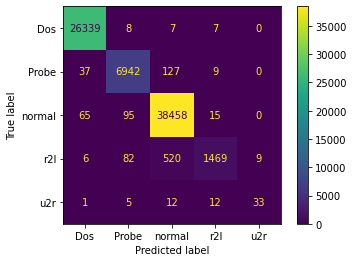

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

target_dict = {'Dos' : 0,
               'Probe' : 1,
               'normal' : 2,
               'r2l' : 3,
               'u2r' : 4}

disp = ConfusionMatrixDisplay(cm, target_dict)
disp.plot()

In [ ]:
mcm = multilabel_confusion_matrix(y_test, y_pred)
print(mcm)

[[[47788   109]
  [   22 26339]]

 [[66953   190]
  [  173  6942]]

 [[34959   666]
  [  175 38458]]

 [[72129    43]
  [  617  1469]]

 [[74186     9]
  [   30    33]]]


In [ ]:
print(cm)

[[26339     8     7     7     0]
 [   37  6942   127     9     0]
 [   65    95 38458    15     0]
 [    6    82   520  1469     9]
 [    1     5    12    12    33]]


In [ ]:
FP = cm.sum (axis = 0) - np.diag (cm) 
FN = cm.sum (axis = 1) - np.diag (cm) 
TP = np.diag (cm) 
TN = cm.sum () - (FP + FN + TP)

print('True positive: ', TP)
print('True negative: ', TN)
print('False positive: ', FP)
print('False negative: ', FN)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)

print('True positive rate: ', TPR)
print('True negative rate: ', TNR)
print('False positive rate: ', FPR)
print('False negative rate: ', FNR)

True positive:  [26339  6942 38458  1469    33]
True negative:  [47788 66953 34959 72129 74186]
False positive:  [109 190 666  43   9]
False negative:  [ 22 173 175 617  30]
True positive rate:  [0.99916543 0.97568517 0.99547019 0.7042186  0.52380952]
True negative rate:  [0.99772428 0.99717022 0.98130526 0.9994042  0.9998787 ]
False positive rate:  [0.00227572 0.00282978 0.01869474 0.0005958  0.0001213 ]
False negative rate:  [0.00083457 0.02431483 0.00452981 0.2957814  0.47619048]


In [ ]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26361
           1       0.97      0.98      0.97      7115
           2       0.98      1.00      0.99     38633
           3       0.97      0.70      0.82      2086
           4       0.79      0.52      0.63        63

    accuracy                           0.99     74258
   macro avg       0.94      0.84      0.88     74258
weighted avg       0.99      0.99      0.99     74258



In [ ]:
print('Accuracy: ', acc)
print('Precision_weighted: ', precision)
print('Recall_weighted: ', recall)
print('mcc: ', mcc)
print('f2: ', f2)

Accuracy:  0.986304505911821
Precision_weighted:  0.9861475606858049
Recall_weighted:  0.986304505911821
mcc:  0.9768812557639845
f2:  0.9862731128702956
